In [174]:
from pandas import DataFrame
from numpy.random import normal, uniform

In [175]:
df = DataFrame(uniform(-5, 10, size = [100, 2]), columns=['train','test'])
df['test'] = df['train'] ** 2 + normal(scale=5, size=[100, 1])[:, 0]
df['test_min'] = df['test'].cummin()

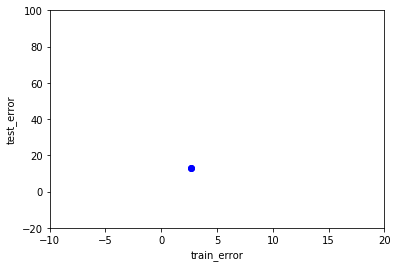

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
ax.plot([df.iat[0, 0]], [df.iat[0, 1]], 'bo')
ax.set_xlim(-10, 20)
ax.set_ylim(-20, 100)
ax.set_xlabel('train_error')
ax.set_ylabel('test_error')


def init():  # only required for blitting to give a clean slate.
    line =  ax.plot([df.iat[0, 0]], [df.iat[0, 1]], 'bo')
    return line


def animate(i):
#     line.set_ydata(np.sin(x + i / 100))  # update the data.
#     return line,
    lines = ax.lines
    plt.setp(lines, color='b')
    
    
    ax.set_title('round = {}'.format(i))
    
    
    line = ax.plot([df.iat[i, 0]], [df.iat[i, 1]], 'ro')

    
    return line


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=100)

In [177]:
# from matplotlib.animation import ImageMagickFileWriter
# writer = ImageMagickWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.gif", writer=writer)

ani.save('line.gif', dpi=80, writer='imagemagick')